<a href="https://colab.research.google.com/github/rfeskov/NNT/blob/main/%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_%D0%A2%D0%B5%D0%BB%D0%B5%D0%B3%D1%80%D0%B0%D0%BC_%D0%98%D0%A2%D0%9C%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install telethon > None

In [3]:
from telethon import TelegramClient
from telethon.tl.types import PeerChannel

import pandas as pd

In [4]:
from google.colab import userdata

In [ ]:
# Укажите ваши api_id, api_hash и id канала

channel_id = 1716539248   # replace with your actual channel ID

# Wrap it in PeerChannel
entity = PeerChannel(channel_id)

# Now you can fetch messages

api_id = '26931982'
api_hash = '24e77c0711c677cfb51e37135f9033af'
# name_chanel = '1716539248'  # ого

In [5]:
async def main(name_chanel, api_id, api_hash):
    #авторизация клиента
    async with TelegramClient('session', api_id, api_hash) as client:
      #получение сообщений из канала
      messages = await client.get_messages(name_chanel, limit=None)  # Установите limit=None для получения всех сообщений
      return(messages)
result = await main(name_chanel, api_id, api_hash)
#Please enter your phone (or bot token): 7xxxxxxxxxx
#Please enter the code you received:
#Signed in successfully as Двойникова Анастасия; remember to not break the ToS or you will risk an account ban!

NameError: name 'name_chanel' is not defined

In [6]:
from telethon import TelegramClient
from telethon.tl.types import PeerChannel

async def main(channel_id, api_id, api_hash):
    async with TelegramClient('session', api_id, api_hash) as client:
        # Resolve the channel entity from its ID
        entity = await client.get_entity(PeerChannel(channel_id))

        # Fetch all messages (be careful, this can be huge!)
        messages = await client.get_messages(entity, limit=None)
        return messages

# Usage:
result = await main(channel_id, api_id, api_hash)

NameError: name 'channel_id' is not defined

In [ ]:
#создаем DataFrame для сохранения нашей бд
data = pd.DataFrame(columns = ['id_post', 'date', 'text', 'views', 'reactions', 'comments'])
i = 0
#проходимся по каждому посту
for message in result:
  #чтобы вычлинять посты только с текстом. Если в пост несколько медиа, то телеграм автоматически разделяет пост на несколько
  if message.text:

    #получаем суммарное кол-во всех реакций
    if message.reactions:
      count_reactions = sum([message.reactions.results[r].count for r in range(len(message.reactions.results)) if message.reactions.results])
    else:
      count_reactions = 0
    #получаем кол-во комментов
    if message.replies:
      count_replies = message.replies.replies
    else:
      count_replies = 0
    #записываем все в dataframe
    data.loc[i] = [message.id, message.date, message.text, message.views, count_reactions, count_replies]
    i += 1


In [ ]:
data.head(5)

,id_post,date,text,views,reactions,comments
0,12279,2025-09-27 11:50:52+00:00,ГООООООООООООЛ!\n\n🏴 Брентфорд 2:0 Ман Юнайтед...,1833,44,21
1,12278,2025-09-27 11:47:44+00:00,💪 И офсайдная ловушка от Магуайра на уровне\n\...,2511,40,5
2,12277,2025-09-27 11:39:28+00:00,ГООООООООООООЛ!\n\n🏴󠁧󠁢󠁥󠁮󠁧󠁿 Брентфорд 1:0 Ман Ю...,3601,82,19
3,12275,2025-09-27 11:18:29+00:00,🏆 Итоги голосования за приз Копа – **Ламин** *...,5021,93,7
4,12274,2025-09-27 11:03:01+00:00,💪 Нуну может возглавить «Вест Хэм»\n\n✈️ [**Фу...,5595,31,1


In [ ]:
len(data)

10922

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# сохраняем нашу базу данных в csv файл
data.to_csv('/content/Superantitmo/real_football.csv', index = False)









In [16]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

data = pd.read_csv('real_football.csv')

Saving real_football.csv to real_football (2).csv


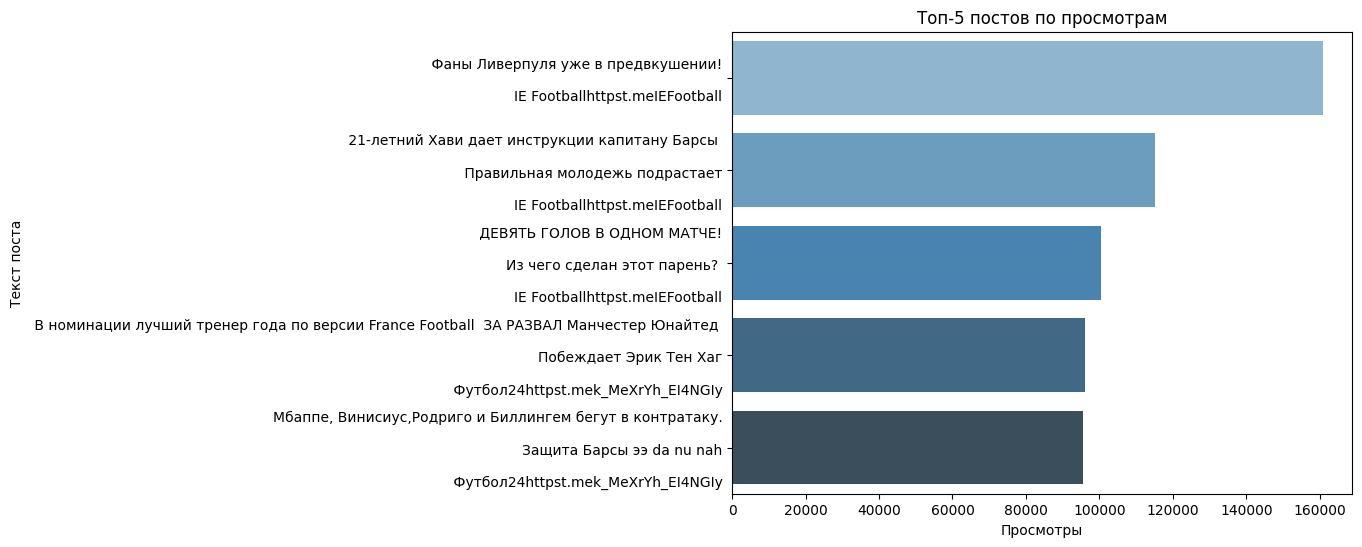

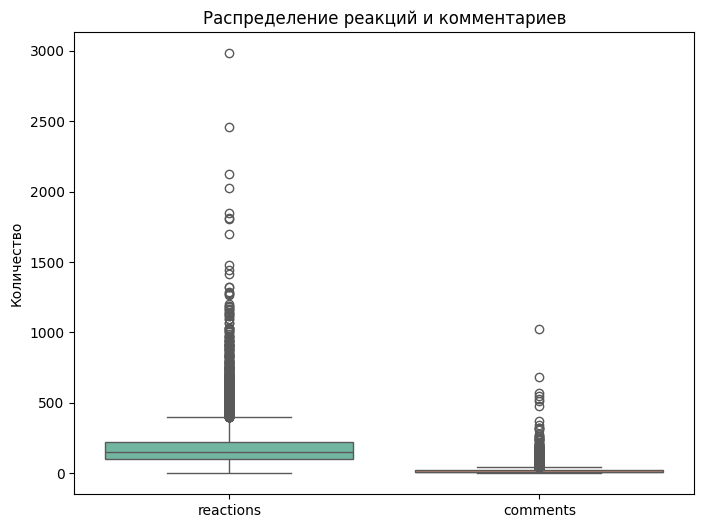

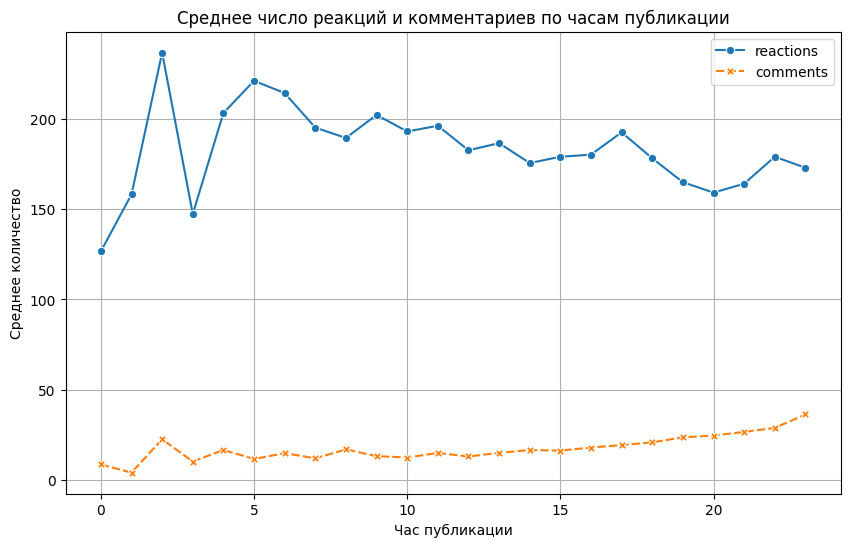

TypeError: unsupported operand type(s) for /: 'range' and 'int'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ============================
# Подготовка
# ============================
# убираем все emoji и символы вне базовой кириллицы/латиницы
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s.,!?–-]', '', x))

data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour


# ============================
# 1. Топ-5 постов по просмотрам
# ============================
plt.figure(figsize=(8,6))
top_posts = data.sort_values(by="views", ascending=False).head(5)
sns.barplot(data=top_posts, x="views", y="text", hue="text",
            dodge=False, palette="Blues_d", legend=False)
plt.title("Топ-5 постов по просмотрам")
plt.xlabel("Просмотры")
plt.ylabel("Текст поста")
plt.show()


# ============================
# 2. Boxplot реакций и комментариев
# ============================
plt.figure(figsize=(8,6))
sns.boxplot(data=data[['reactions','comments']], palette="Set2")
plt.title("Распределение реакций и комментариев")
plt.ylabel("Количество")
plt.show()


# ============================
# 3. Средние реакции/комментарии по часу публикации
# ============================
plt.figure(figsize=(10,6))
hourly_stats = data.groupby("hour")[["reactions","comments"]].mean()
sns.lineplot(data=hourly_stats, markers=True)
plt.title("Среднее число реакций и комментариев по часам публикации")
plt.xlabel("Час публикации")
plt.ylabel("Среднее количество")
plt.grid(True)
plt.show()


# ============================
# 4. Pareto-анализ просмотров
# ============================
data_sorted = data.sort_values("views", ascending=False)
data_sorted["cum_views"] = data_sorted["views"].cumsum()
data_sorted["cum_views_share"] = data_sorted["cum_views"] / data_sorted["views"].sum()
data_sorted["post_share"] = (range(1, len(data_sorted)+1)) / len(data_sorted)

plt.figure(figsize=(10,6))
plt.plot(data_sorted["post_share"], data_sorted["cum_views_share"], marker='o')
plt.plot([0,1],[0,1], "--", color="gray")  # линия равенства
plt.title("Pareto-анализ просмотров (кривая Лоренца)")
plt.xlabel("Доля постов")
plt.ylabel("Доля просмотров (кумулятивная)")
plt.grid(True)
plt.show()


